In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import missingno as  msno
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/sem_9/reported_numbers.csv")
df.head().style.background_gradient(cmap='Reds')

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.000000,10.000000,Eastern Mediterranean
1,Algeria,2017,0.000000,0.000000,Africa
2,Angola,2017,3874892.000000,13967.000000,Africa
3,Argentina,2017,0.000000,1.000000,Americas
4,Armenia,2017,0.000000,nan,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [ ]:
df.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

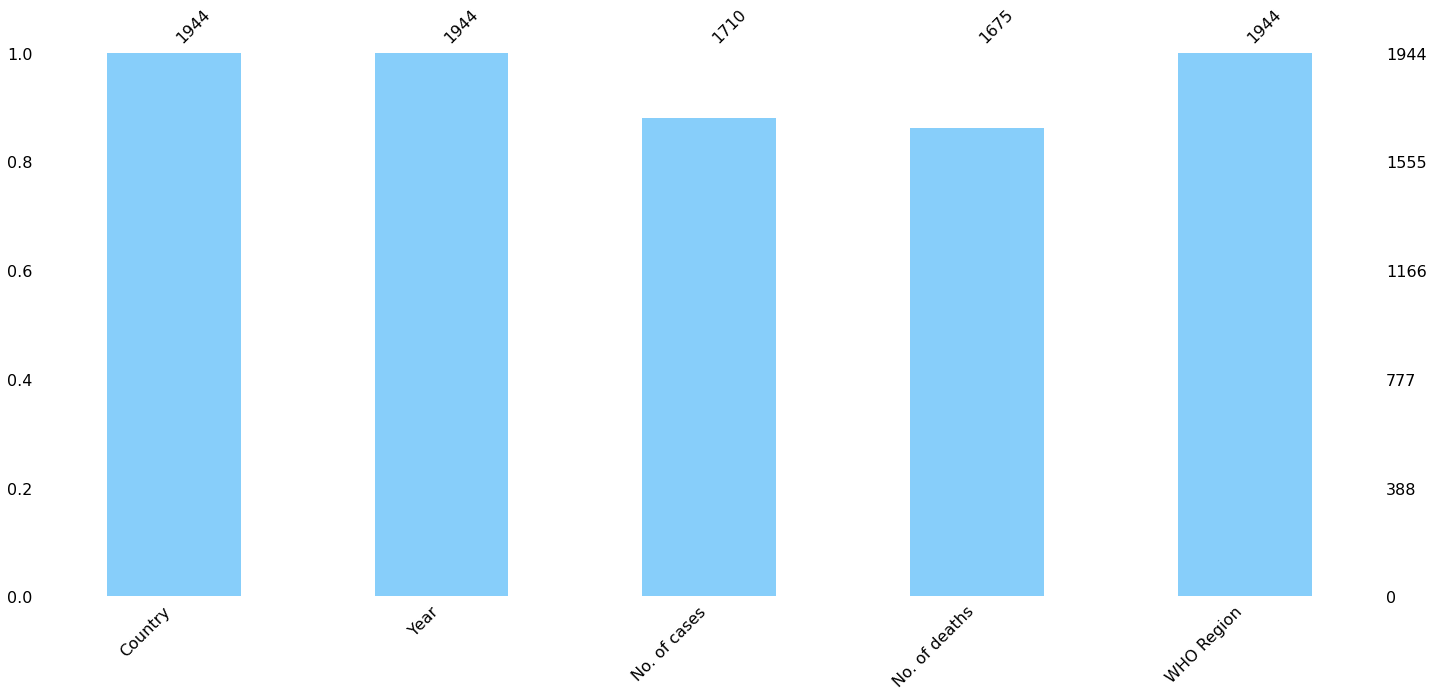

In [ ]:
n = msno.bar(df,color = "lightskyblue")


In [ ]:
##Dropping the null values
df.dropna(inplace=True)
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [ ]:
df_group =df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df_group.head()

,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [ ]:
df_cases = df_group[["Country","No. of cases"]]
df_cases.head()

,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


In [ ]:
pio.templates.default ='plotly_dark'
fig = px.bar(df_cases.sort_values("No. of cases",ascending=False)[:20][::-1],x="No. of cases",y ="Country",text="No. of cases",
             title="Top 20 Country with highest number of Malaria Cases till 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=900,orientation="h")#
fig.show()

In [ ]:
df_death = df_group[["Country","No. of deaths"]]
pio.templates.default ='plotly_dark'
fig = px.bar(df_death.sort_values("No. of deaths",ascending=False)[:20][::-1],x="No. of deaths",y ="Country",text="No. of deaths",
             title="Top 20 Country with highest number of Malaria Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=800,orientation="h")
fig.show()

In [ ]:
who_group =df.groupby('WHO Region')["No. of cases","No. of deaths"].sum().reset_index()
who_group.head().style.background_gradient(cmap ='Reds')

,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.000000,1480850.000000
1,Americas,13433321.000000,11039.000000
2,Eastern Mediterranean,15841260.000000,26764.000000
3,Europe,112675.000000,25.000000
4,South-East Asia,38305249.000000,49802.000000


In [ ]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of cases",ascending=False)[::-1],y="No. of cases",x ="WHO Region",text="No. of cases",
             title="WHO regions with highest number of Cases from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                             values=who_group['No. of cases'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

In [ ]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No. of deaths",ascending=False)[::-1],y="No. of deaths",x ="WHO Region",text="No. of deaths",
             title="WHO regions with highest number of Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=who_group["WHO Region"],
                                 values=who_group['No. of deaths'])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(width=800,
    height=600)
fig.show()

In [ ]:
def plot_treemap_cases(dataframe,variable,value):
  fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),path=[variable],values=value,title=("Highest number of Cases from 2000 to 2018 according to" + str(variable) + "<br>"),color_discrete_sequence = px.colors.qualitative.Set1)
  fig.data[0].textinfo = 'label+text+value'
  fig.show()
    
def plot_treemap_deaths(dataframe,variable,value):
  fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),path=[variable],values=value,title=("Highest number of Death Cases from 2000 to 2018 according to" + str(variable) + "<br>"),color_discrete_sequence = px.colors.qualitative.Set1)
  fig.data[0].textinfo = 'label+text+value'  
  fig.show()

In [ ]:
plot_treemap_cases(df_group,"Country","No. of cases")

TypeError: ignored

In [ ]:
year_group= df.groupby("Year")[["No. of cases","No. of deaths"]].sum().reset_index()
year_group.head()

,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


In [ ]:
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))

trace_1 = go.Scatter(x=year_group['Year'],y=year_group['No. of cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=year_group['Year'],y=year_group['No. of deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)

fig.update_layout(title_text="Spread of Malaria according to Year")
fig.show()


In [ ]:
fig = px.choropleth(df_group,locationmode="country names",locations ="Country",hover_data = ["Country","No. of cases","No. of deaths"],
                    hover_name = "Country",color="Country",title="Situation of Malaria Over the World")
fig.show()

In [ ]:
india = df[df["Country"] == "India"]
india.tail()

,Country,Year,No. of cases,No. of deaths,WHO Region
1451,India,2004,1915363.0,949.0,South-East Asia
1559,India,2003,1869403.0,1006.0,South-East Asia
1667,India,2002,1841227.0,973.0,South-East Asia
1775,India,2001,2085484.0,1015.0,South-East Asia
1883,India,2000,2031790.0,892.0,South-East Asia


In [ ]:
#whole = df_n.groupby('Date')['Date','Confirmed','Deaths','Recovered','Active'].sum().reset_index()
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))

trace_1 = go.Scatter(x=india['Year'],y=india['No. of cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=india['Year'],y=india['No. of deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)

fig.update_layout(title_text="Malaria Report of INDIA")
fig.show()